## Background

At Shopee, we always strive to ensure the correct listing and categorization of products. For example due to the recent pandemic situation, face masks become extremely popular for both buyers and sellers, everyday we need to categorize and update a huge number of masks items. A robust product detection system will significantly improve the listing and categorization efficiency. But in the industrial field the data is always much more complicated and there exists mis-labelled images, complex background images and low resolution images, etc. The noisy and imbalanced data and multiple categories make this problem still challenging in the modern computer vision field.

## Task

In this competition, a multiple image classification model needs to be built. There are ~100k images within 42 different categories, including essential medical tools like masks, protective suits and thermometers, home & living products like air-conditioner and fashion products like T-shirts, rings, etc. For the data security purpose the category names will be desensitized. The evaluation metrics is top-1 accuracy.

https://www.kaggle.com/c/shopee-product-detection-open/overview/description

In [196]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random
from glob import glob
from tqdm import tqdm

In [197]:
train_df = pd.read_csv('./data/train.csv')
train_df.head()

,filename,category
0,45e2d0c97f7bdf8cbf3594beb6fdcda0.jpg,3
1,f74d1a5fc2498bbbfa045c74e3cc333e.jpg,3
2,f6c172096818c5fab10ecae722840798.jpg,3
3,251ffd610399ac00fea7709c642676ee.jpg,3
4,73c7328b8eda399199fdedec6e4badaf.jpg,3


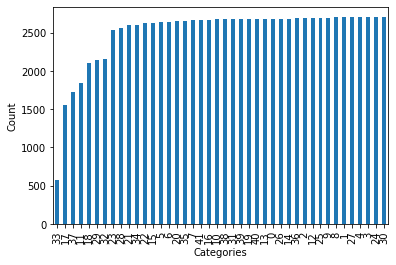

In [198]:
train_df['category'].value_counts().sort_values().plot(kind='bar')
plt.xlabel("Categories")
plt.ylabel("Count");

In [199]:
# Path to datasets
train_path = './data/train/train'
test_path = './data/test/test'

classes = [folder[len(train_path) + 1:] for folder in glob(train_path + '/*')]
classes.sort()

In [200]:
def show_one_sample(base_path):
    cols = 5
    rows = int(np.ceil(len(classes) / cols))
    fig = plt.figure(figsize=(16, 20))
    
    for i in range(len(classes)):
        cls = classes[i]
        img_path = base_path + '/' + cls + '/**'
        path_contents = glob(img_path)
    
        imgs = random.sample(path_contents, 1)

        sp = plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(cv2.imread(imgs[0]), cv2.COLOR_BGR2RGB))
        plt.title(cls)
        sp.axis('off')

    plt.show()
    return

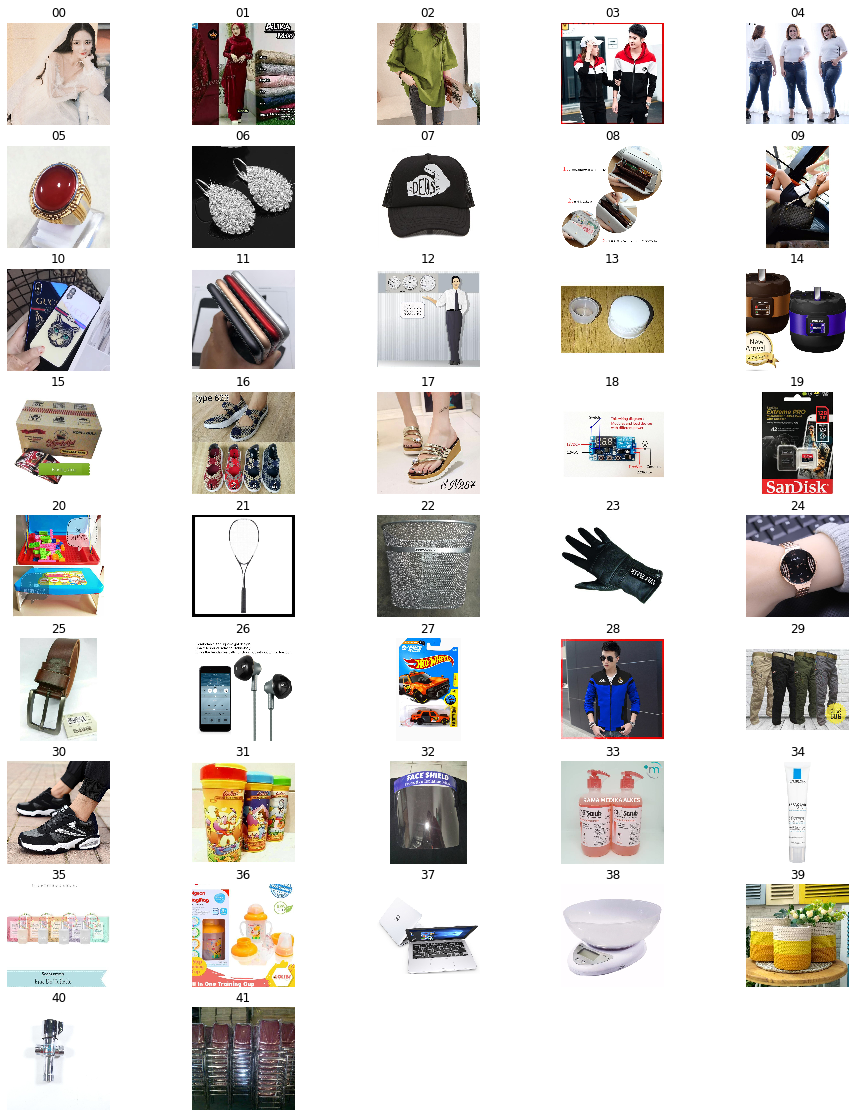

In [201]:
# To get a sense of what makes up the 42 categories
show_one_sample(train_path)

In [202]:
classes

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41']

https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/

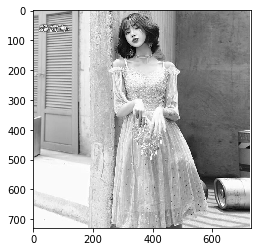

In [203]:
for cls in classes:
    path = os.path.join(train_path, cls) # Create path to all images
    for img in os.listdir(path): # Iterate over each image
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # Convert to array
        plt.imshow(img_array, cmap='gray') # Graph it
        plt.show() # Display
        
        break # We just want to show one image
    break

In [204]:
print(img_array)

[[253 255 180 ... 254 255 255]
 [254 254 180 ... 255 255 255]
 [254 253 183 ... 254 255 255]
 ...
 [255 254 245 ... 255 253 255]
 [255 252 240 ... 253 254 255]
 [255 253 244 ... 255 254 254]]


In [205]:
print(img_array.shape)

(729, 729)


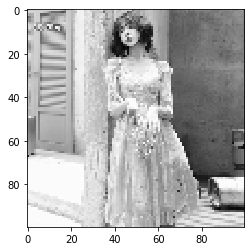

In [206]:
img_size = 100 # We will resize our images to 100 px

# Resize image
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [207]:
new_array.shape

(100, 100)

/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 100, 100) (100 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


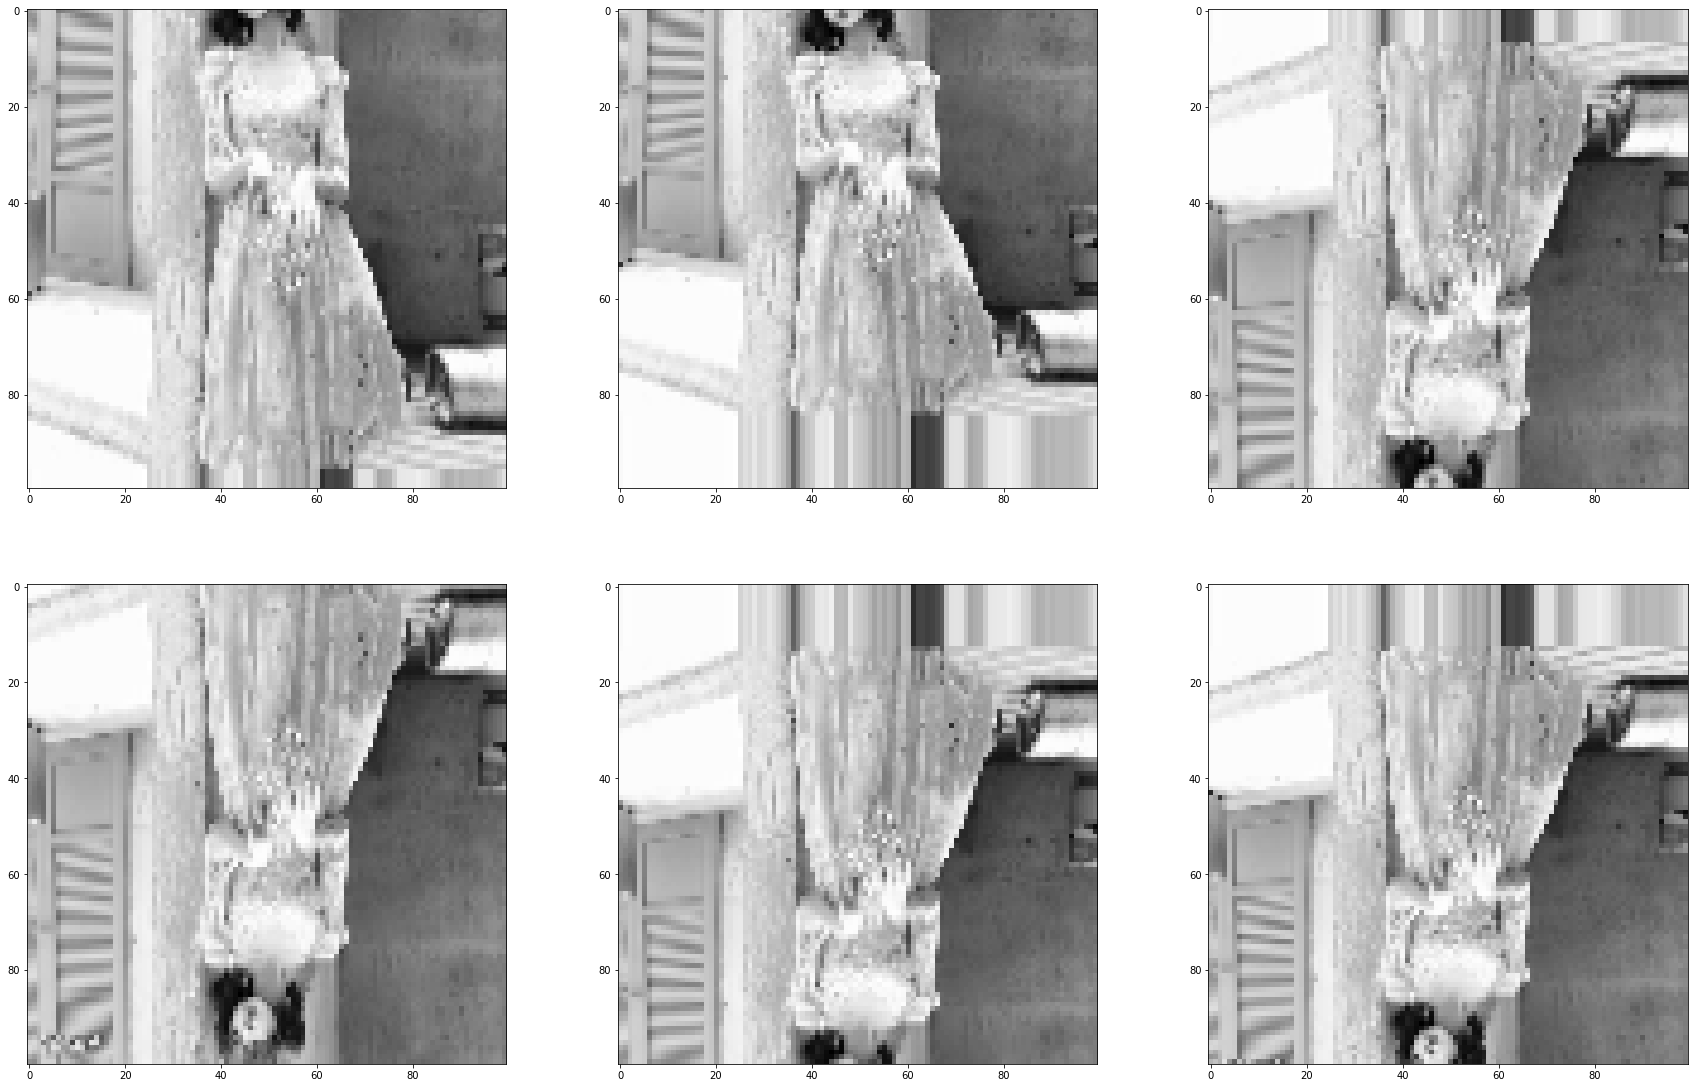

In [208]:
# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

new_array = new_array.reshape((1,1,) + new_array.shape)

it = datagen.flow(new_array, batch_size=1)

plt.figure(figsize=(30,30))

for i in range(6):
    plt.subplot(330+1+i)
    batch = it.next()
    image = batch[0].astype('uint8')[0]
    plt.imshow(image, cmap='gray')
    
plt.show()

In [224]:
image/255

array([[0.96862745, 0.98431373, 0.98431373, ..., 0.75686275, 0.81176471,
        0.87058824],
       [0.96862745, 0.98431373, 0.98431373, ..., 0.75686275, 0.81176471,
        0.87058824],
       [0.96862745, 0.98431373, 0.98431373, ..., 0.75686275, 0.81176471,
        0.87058824],
       ...,
       [0.71764706, 0.6745098 , 0.73333333, ..., 0.51372549, 0.50980392,
        0.49411765],
       [0.58431373, 0.60784314, 0.71372549, ..., 0.51764706, 0.51764706,
        0.48627451],
       [0.70980392, 0.75294118, 0.69411765, ..., 0.50588235, 0.50980392,
        0.48235294]])

In [327]:
# Without data augmentation
train = []
img_names = []
def create_train():
    
    for cls in classes:
        
        path = os.path.join(train_path, cls) # Create path to all images
        random_img = pd.Series(os.listdir(path)).sample(2500, replace=True).values # Randomly sample N images
        img_names.append(random_img)
        
        for img in tqdm(random_img): # Iterate over each image
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # Convert to array #
            new_array = cv2.resize(img_array, (img_size, img_size))
            train.append([new_array, int(cls)])     

In [320]:
# With data augmentation
# train = []
# img_names = []
# def create_train():
    
#     datagen = ImageDataGenerator(
#             rotation_range=40,
#             width_shift_range=0.2,
#             height_shift_range=0.2,
#             shear_range=0.2,
#             zoom_range=0.2,
#             horizontal_flip=True,
#             fill_mode='nearest')
    
#     for cls in classes:
        
#         path = os.path.join(train_path, cls) # Create path to all images
#         random_img = pd.Series(os.listdir(path)).sample(1, replace=True).values # Randomly sample N images
#         img_names.append(random_img)
        
#         for img in tqdm(random_img): # Iterate over each image
#             img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # Convert to array 
#             new_array = cv2.resize(img_array, (img_size, img_size))
#             new_array = new_array.reshape((1,1,) + new_array.shape)
#             train.append([new_array/255, int(cls)]) 
            
# #             for i in range(1): # Create 2 augmented images for each original image
#             it = datagen.flow(new_array, batch_size=1) # Create augmented image
#             batch = it.next()
#             image = batch[0][0]
#             train.append([image/255, int(cls)]) 

In [328]:
create_train()

100%|██████████| 2500/2500 [00:07<00:00, 348.54it/s]


In [329]:
print(len(train))

105000


We have 21,000 samples!

In [330]:
# Shuffle training data
random.shuffle(train)

In [331]:
train[0]

[array([[145, 146, 148, ..., 158, 158, 158],
        [147, 147, 147, ..., 158, 158, 157],
        [146, 145, 148, ..., 158, 158, 158],
        ...,
        [163, 165, 166, ..., 182, 182, 182],
        [163, 163, 163, ..., 181, 181, 180],
        [162, 162, 162, ..., 179, 179, 179]], dtype=uint8),
 7]

In [332]:
# Print out the classes after we have shuffled our training data
for sample in train[:10]:
    print(sample[1])

7
29
39
38
11
29
11
25
20
6


In [333]:
X = []
y = []

for features, label in train:
    X.append(features)
    y.append(label)
    
print(X[0].reshape(-1, img_size, img_size, 1))

X = np.array(X).reshape(-1, img_size, img_size, 1)

[[[[145]
   [146]
   [148]
   ...
   [158]
   [158]
   [158]]

  [[147]
   [147]
   [147]
   ...
   [158]
   [158]
   [157]]

  [[146]
   [145]
   [148]
   ...
   [158]
   [158]
   [158]]

  ...

  [[163]
   [165]
   [166]
   ...
   [182]
   [182]
   [182]]

  [[163]
   [163]
   [163]
   ...
   [181]
   [181]
   [180]]

  [[162]
   [162]
   [162]
   ...
   [179]
   [179]
   [179]]]]


In [334]:
X[0]

array([[[145],
        [146],
        [148],
        ...,
        [158],
        [158],
        [158]],

       [[147],
        [147],
        [147],
        ...,
        [158],
        [158],
        [157]],

       [[146],
        [145],
        [148],
        ...,
        [158],
        [158],
        [158]],

       ...,

       [[163],
        [165],
        [166],
        ...,
        [182],
        [182],
        [182]],

       [[163],
        [163],
        [163],
        ...,
        [181],
        [181],
        [180]],

       [[162],
        [162],
        [162],
        ...,
        [179],
        [179],
        [179]]], dtype=uint8)

In [335]:
from tensorflow.keras import utils
y = utils.to_categorical(y,42)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [336]:
# Save this data so that we don't need to recalculate every time we tune the NN
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [337]:
X.shape

(105000, 100, 100, 1)

In [338]:
y.shape

(105000, 42)

Let's start building our network!

In [343]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
# y = np.array(y)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(42, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 42)                3226986   
Total params: 3,227,306
Trainable params: 3,227,306
Non-trainable params: 0
____________________________________________

In [344]:
# Callback to save the models and weights
from tensorflow.keras.callbacks import ModelCheckpoint

outputFolder = './output'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath = outputFolder+"/model-{epoch:02d}-{val_accuracy:.2f}.hdf5"

checkpoint_callback = ModelCheckpoint(
    filepath, monitor='val_accuracy', verbose=1,
    save_best_only=False, save_weights_only=False,
    save_frequency=1)

In [345]:
model.fit(X, y, batch_size=64, epochs=10, validation_split=0.2, callbacks=[checkpoint_callback])

Epoch 1/10
1313/1313 [==============================] - ETA: 0s - loss: 2.9175 - accuracy: 0.2766
Epoch 00001: saving model to ./output/model-01-0.39.hdf5
1313/1313 [==============================] - 218s 166ms/step - loss: 2.9175 - accuracy: 0.2766 - val_loss: 2.4785 - val_accuracy: 0.3882
Epoch 2/10
1313/1313 [==============================] - ETA: 0s - loss: 1.8034 - accuracy: 0.5543
Epoch 00002: saving model to ./output/model-02-0.50.hdf5
1313/1313 [==============================] - 211s 161ms/step - loss: 1.8034 - accuracy: 0.5543 - val_loss: 2.1229 - val_accuracy: 0.5035
Epoch 3/10
1313/1313 [==============================] - ETA: 0s - loss: 1.1632 - accuracy: 0.7137
Epoch 00003: saving model to ./output/model-03-0.57.hdf5
1313/1313 [==============================] - 206s 157ms/step - loss: 1.1632 - accuracy: 0.7137 - val_loss: 2.0136 - val_accuracy: 0.5737
Epoch 4/10
1313/1313 [==============================] - ETA: 0s - loss: 0.7598 - accuracy: 0.8140
Epoch 00004: saving model 

KeyboardInterrupt: 

In [363]:
# Preparing the test data
test = []
test_img_names = []

def create_test():

    test_img = pd.Series(os.listdir(test_path)).values 
            
    for img in tqdm(test_img): # Iterate over each image
        img_array = cv2.imread(os.path.join(test_path, img), cv2.IMREAD_GRAYSCALE) # Convert to array #
        new_array = cv2.resize(img_array, (img_size, img_size))
        test.append([new_array])
        test_img_names.append(img)

In [364]:
create_test()

100%|██████████| 12192/12192 [00:37<00:00, 327.40it/s]


In [368]:
test_img_names[:2]

['d5fa9c94316e7413e9c2ac53219402c6.jpg',
 '78c684bd9fcf4403be89026a308f99ef.jpg']

In [370]:
len(test_img_names)

12192

In [366]:
# Reshaping test data
test = np.array(test).reshape(-1, img_size, img_size, 1)

In [367]:
test.shape

(12192, 100, 100, 1)

In [371]:
# Load weights
model.load_weights('./output/model-05-0.63.hdf5')

In [372]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [373]:
# Prediction on test set
pred = model.predict(test, verbose=1)

381/381 [==============================] - 4s 11ms/step


In [376]:
# Import test dataframe
test_df = pd.read_csv('./data/test.csv')

In [378]:
test_df = test_df.drop('category', axis=1)

In [380]:
test

array([[[[243],
         [244],
         [244],
         ...,
         [236],
         [237],
         [236]],

        [[242],
         [244],
         [243],
         ...,
         [237],
         [238],
         [236]],

        [[243],
         [243],
         [243],
         ...,
         [237],
         [234],
         [236]],

        ...,

        [[226],
         [226],
         [226],
         ...,
         [223],
         [221],
         [221]],

        [[226],
         [226],
         [226],
         ...,
         [224],
         [222],
         [217]],

        [[226],
         [225],
         [226],
         ...,
         [225],
         [222],
         [219]]],


       [[[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [

In [346]:
# # Resnet50
# import pickle

# pickle_in = open("X.pickle","rb")
# X = pickle.load(pickle_in)

# pickle_in = open("y.pickle","rb")
# y = pickle.load(pickle_in)

# X = X/255.0

# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.models import Model
# base_model = ResNet50(weights= None, include_top=False, input_shape= (100,100,1))

# x = base_model.output
# x = MaxPooling2D()(x)
# x = Dropout(0.7)(x)
# x = Flatten()(x)
# predictions = Dense(42, activation= 'softmax')(x)
# model = Model(inputs = base_model.input, outputs = predictions)

# # from keras.optimizers import SGD, Adam
# # sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
# # adam = Adam(lr=0.0001)
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# model.fit(X, y, batch_size=128, epochs=10, validation_split=0.2)